<a href="https://colab.research.google.com/github/rocruzlathrop/retri-social/blob/main/Cuaderno_ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuaderno de ejemplos

Haz tú primer código

In [ ]:
print("Hola mundo")

Hola mundo


Define una variable que sea una fila con 10 números

In [ ]:
X = range(10)

En la siguiente fila visualizamos los dígitos

In [ ]:
for value in X:
  print(value)

0
1
2
3
4
5
6
7
8
9


Ejemplo con Numpy

In [ ]:
import numpy as np

a = np.array([1, 2, 3])
print(a * 2)  # [2 4 6]


[2 4 6]


Ejemplo con Pandas

# Algunas funciones de **Pandas**

Cargar las librerías

In [2]:
import numpy as np
import pandas as pd

Crea un objeto!

In [3]:
p = pd.Series([1, 2, 5, np.nan, 6, 8])
p

,0
0,1.0
1,2.0
2,5.0
3,NaN
4,6.0
5,8.0


In [5]:
import pandas as pd

df = pd.DataFrame({'Nombre': ['Ana', 'Luis'], 'Edad': [23, 35]})
print(df['Edad'].mean())  # 29.0


29.0


In [7]:
print (df)

  Nombre  Edad
0    Ana    23
1   Luis    35


In [11]:
import pandas as pd

df2 = pd.DataFrame({'Nombre':['Ana','Luis','José'],'Edad': [23,35,45]})

print(df2['Edad'].mean())

34.333333333333336


In [9]:
print (df2)

  Nombre  Edad
0    Ana    23
1   Luis    35
2   José    45


Crea una tabla de datos

In [5]:
fechas = pd.date_range("20130101", periods=6)
fechas

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
import numpy as np
import pandas as pd

df3 = pd.DataFrame(np.random.randn(6, 4), index=fechas, columns=list("ABCD"))
df3

,A,B,C,D
2013-01-01,-1.179936,-0.485214,-0.396080,-0.569135
2013-01-02,1.428651,-0.156006,0.111130,-0.473443
2013-01-03,-0.574237,-0.950384,-0.114742,0.975358
2013-01-04,0.177370,-1.234239,0.895189,-1.917334
2013-01-05,0.660537,2.441532,1.486803,0.923770
2013-01-06,0.384317,1.611227,-1.534663,-0.085318


In [13]:
df4 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["🐶", "🐱", "🐶", "🐱"]),
        "F": "foo",
    }
)
df4

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,🐶,foo
1,1.0,2013-01-02,1.0,3,🐱,foo
2,1.0,2013-01-02,1.0,3,🐶,foo
3,1.0,2013-01-02,1.0,3,🐱,foo


Visualizar datos!

In [15]:
df4.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,🐶,foo
1,1.0,2013-01-02,1.0,3,🐱,foo
2,1.0,2013-01-02,1.0,3,🐶,foo
3,1.0,2013-01-02,1.0,3,🐱,foo


In [16]:
df4.tail(3)

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,🐱,foo
2,1.0,2013-01-02,1.0,3,🐶,foo
3,1.0,2013-01-02,1.0,3,🐱,foo


In [17]:
df4.describe()

,A,B,C,D
count,4.0,4,4.0,4.0
mean,1.0,2013-01-02 00:00:00,1.0,3.0
min,1.0,2013-01-02 00:00:00,1.0,3.0
25%,1.0,2013-01-02 00:00:00,1.0,3.0
50%,1.0,2013-01-02 00:00:00,1.0,3.0
75%,1.0,2013-01-02 00:00:00,1.0,3.0
max,1.0,2013-01-02 00:00:00,1.0,3.0
std,0.0,NaN,0.0,0.0


Seleccionar por etiqueta los dos puntos extremos están incluídos

In [20]:
df3.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.428651,-0.156006
2013-01-03,-0.574237,-0.950384
2013-01-04,0.177370,-1.234239


In [ ]:
Gráficos

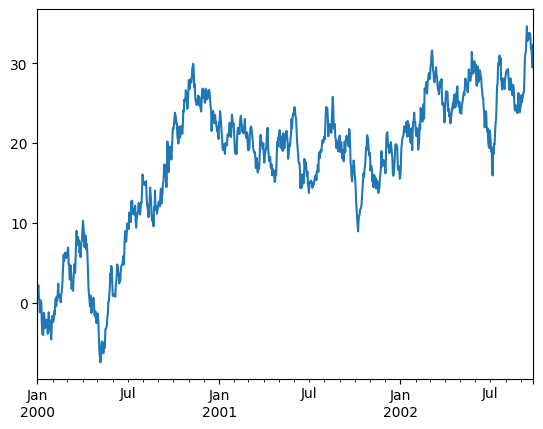

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

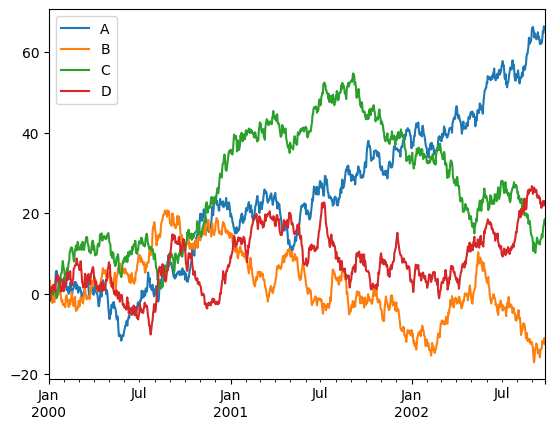

In [4]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

Importar y exportar datos a csv

Guardar un data frame de pandas en formato csv

In [6]:
df.to_csv("foo.csv")

Leer csv

In [7]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.047891,0.746721,-0.086912,0.860411
1,2000-01-02,-0.981487,3.367867,1.183869,0.154767
2,2000-01-03,-0.115429,3.297877,0.403866,-1.851442
3,2000-01-04,0.177342,1.169050,-1.463401,0.046199
4,2000-01-05,-1.201897,1.594419,-0.934431,0.996692
...,...,...,...,...,...
995,2002-09-22,65.295251,-12.183704,15.584631,23.007345
996,2002-09-23,64.818859,-12.394801,16.838036,21.895246
997,2002-09-24,66.498026,-11.414762,17.088238,22.189783
998,2002-09-25,66.224150,-11.035930,18.310589,23.014208


# Código para búsqueda de noticias


In [ ]:
import requests
import pandas as pd

keyword = 'Zimbabwe 2017 protest'
country_code = 'sn'  # Código de país de Senegal
api_url = 'https://api.scrape-it.cloud/scrape/google'
headers = {'x-api-key': ' 4bf9003c-b35c-42fb-925a-a22b91bf4cf7’}
params = {
    'q': keyword,
    'domain': 'google.com',
    'tbm': 'nws',
    'tbs': 'cdr:1,cd_min:2017,cd_max:2017',
    'sort': 'r',  # Filtro para obtener las noticias de mayor relevancia
    'sn': country_code,  # Filtro por país
    'num': 10  # Número de resultados por solicitud
}

all_news = []

try:
    # Primera solicitud
    response = requests.get(api_url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        all_news.extend(data['newsResults'])
    else:
        print(f"Error en la solicitud 1: {response.status_code}")

    # Segunda solicitud para obtener más resultados
    params['start'] = 10  # Comienza desde el 11º resultado
    response = requests.get(api_url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        all_news.extend(data['newsResults'])
    else:
        print(f"Error en la solicitud 2: {response.status_code}")

    if all_news:
        df = pd.DataFrame(all_news)
        df.to_excel("Zimbabwe_2017_relevance_Senegal.xlsx", index=False)
except Exception as e:
    print('Error:', e)


SyntaxError: unterminated string literal (detected at line 7) (ipython-input-5-954727476.py, line 7)